In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import random
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.decomposition import PCA
import sklearn.cluster as sklc

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

In [5]:
cl=pd.read_csv('ASD_PH2.csv')
cl.tail()

,Timestamp,Name,Age,Gender,Ethnicity,Country,A1,A2,A3,A4,...,A6,A7,A8,A9,A10,Jaundice,PDIS,BISE,Anyone in the family has Autism?,Res
92,3/15/2019 22:57:24,Aditi Vinay,28,0,Indian,India,0,0,1,0,...,1,0,0,0,1,1,0,2,0,3
93,3/15/2019 22:58:33,Afham Mohammed,34,1,Indian,India,1,1,1,0,...,1,0,0,0,1,0,1,2,1,6
94,3/15/2019 23:00:00,Neeharika Patel,34,0,Indian,India,0,1,1,0,...,1,0,0,0,1,1,0,2,1,5
95,3/15/2019 23:01:01,Yaseen Khan,40,1,Indian,India,0,1,1,0,...,1,0,1,0,1,0,0,2,0,5
96,3/15/2019 23:08:51,Shreyas Dani,33,1,Indian,India,1,0,0,0,...,1,0,1,1,1,1,0,1,1,6


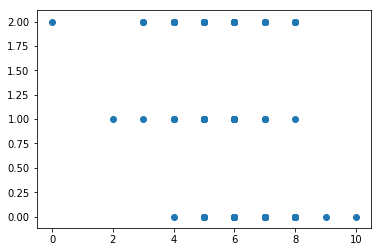

In [4]:
plt.scatter(cl['Res'],cl['BISE'])

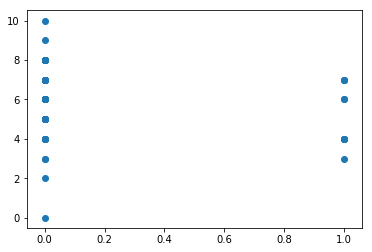

In [5]:
plt.scatter(cl['PDIS'],cl['Res'])

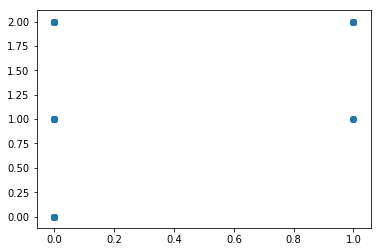

In [6]:
plt.scatter(cl['PDIS'],cl['BISE'])

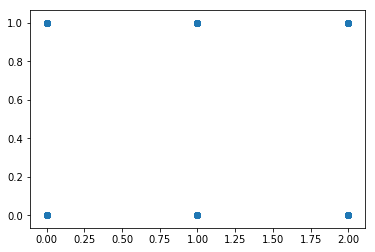

In [74]:
plt.scatter(cl['BISE'],cl['Gender'])

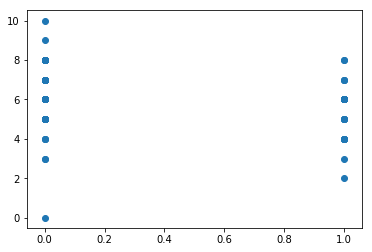

In [7]:
plt.scatter(cl['Anyone in the family has Autism?'],cl['Res'])

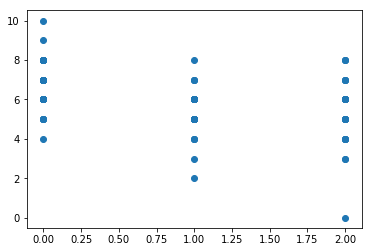

In [8]:
plt.scatter(cl['BISE'],cl['Res'])

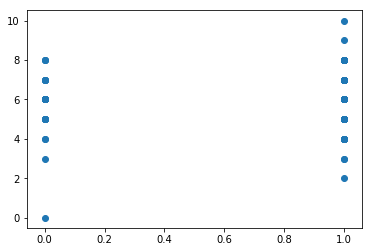

In [9]:
plt.scatter(cl['Gender'],cl['Res'])

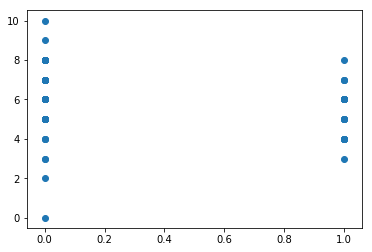

In [10]:
plt.scatter(cl['Jaundice'],cl['Res'])

In [11]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
y_predicted=km.fit_predict(cl[['BISE','Res']])
y_predicted

array([0, 1, 1, 2, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0])

In [21]:
cl['cluster']=y_predicted
cl


,Timestamp,Name,Age,Gender,Ethnicity,Country,A1,A2,A3,A4,...,A7,A8,A9,A10,Jaundice,PDIS,BISE,Anyone in the family has Autism?,Res,cluster
0,2/25/2019 16:51:28,ANI,22,1,INDIAN,INDIA,1,0,0,1,...,1,0,1,0,0,0,1,0,5,0
1,2/25/2019 16:54:51,ANI,22,1,INDIAN,INDIA,1,0,0,1,...,1,0,1,0,0,0,2,0,5,0
2,2/25/2019 16:55:40,ANI,22,1,INDIAN,INDIA,1,0,0,1,...,1,0,1,0,0,0,2,0,5,0
3,2/25/2019 18:34:44,anirudh,24,1,INDIAN,India,1,1,0,0,...,1,0,1,1,0,0,1,0,7,1
4,2/25/2019 18:36:02,arya,27,1,INDIAN,India,0,0,0,1,...,1,0,1,1,0,0,0,0,5,0
5,2/25/2019 19:29:12,Ani,23,1,INDIAN,INDIA,0,1,1,0,...,1,0,1,0,1,0,1,0,5,0
6,2/25/2019 19:35:51,God,22,1,all,everywhere,0,1,0,1,...,0,0,1,1,0,0,2,0,4,0
7,2/25/2019 19:38:12,Redacted,35,1,Redacted,Redacted,1,0,0,1,...,1,1,1,0,0,0,1,0,7,1
8,2/25/2019 19:51:25,Avisha Hadalamborghini,69,0,KKK,Lingaraj Puram,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
9,2/25/2019 19:53:07,Jayanth,50,1,Asian,Pakiatan,1,0,0,1,...,1,1,1,1,0,1,2,0,7,1


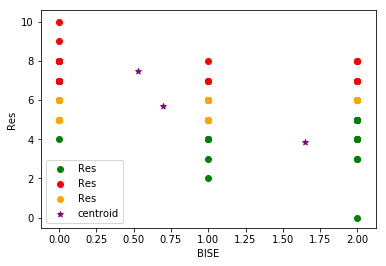

In [99]:
cl1=cl[cl.cluster==0]
cl2=cl[cl.cluster==1]
cl3=cl[cl.cluster==2]


plt.scatter(cl1['BISE'],cl1['Res'],color='green')
plt.scatter(cl2['BISE'],cl2['Res'],color='red')
plt.scatter(cl3['BISE'],cl3['Res'],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('BISE')
plt.ylabel('Res')
plt.legend()

In [20]:
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(cl[['BISE','Res']])
y_predicted

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1])

In [95]:
km.cluster_centers_

array([[1.65      , 3.85      ],
       [0.52941176, 7.5       ],
       [0.69767442, 5.69767442]])

In [100]:
k_rng= range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(cl[['BISE','Res']])
    sse.append(km.inertia_)

In [101]:
sse

[296.10309278350513,
 152.38967803030306,
 106.21012311901504,
 78.19396993810787,
 59.621161821686556,
 48.18538647342994,
 39.157058159232065,
 30.26818181818181,
 25.63278943278943]

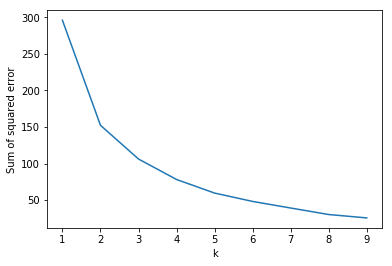

In [102]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [22]:
feature_cols=['Age','Res','BISE','Gender']
x=cl[feature_cols]
y=cl.cluster

In [23]:
#here we split the originial dataset into training set and testing set.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [24]:
#train the model by importing LOGISTICREGRESSION and feed the data.
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\vishnusourabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred_class=logreg.predict(x_test)

In [26]:
from sklearn import metrics
print (metrics.accuracy_score(y_test,y_pred_class))

0.8


In [27]:
cl.to_csv("ASD_3.csv",index=False,sep=',',encoding='utf-8')

In [6]:
cl.describe()

,Age,Gender,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Jaundice,PDIS,BISE,Anyone in the family has Autism?,Res
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,30.701031,0.701031,0.742268,0.577320,0.350515,0.494845,0.781250,0.525773,0.670103,0.546392,0.701031,0.577320,0.237113,0.103093,0.835052,0.298969,5.948454
std,11.057770,0.460184,0.439658,0.496552,0.479610,0.502571,0.415569,0.501929,0.472618,0.500429,0.460184,0.496552,0.427522,0.305660,0.850005,0.460184,1.536847
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,29.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,6.000000
75%,37.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,7.000000
max,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,10.000000


In [7]:
cl.corr()

,Age,Gender,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Jaundice,PDIS,BISE,Anyone in the family has Autism?,Res
Age,1.000000,-0.073019,-0.260274,-0.055506,0.230129,-0.332988,-0.307488,0.206913,-0.451594,-0.256301,-0.249065,0.297360,0.317024,0.258851,0.411403,0.330947,-0.336204
Gender,-0.073019,1.000000,-0.024416,-0.057335,-0.039411,0.150908,0.090891,0.011158,0.020738,0.128704,0.163793,-0.148507,-0.112443,0.147348,-0.100756,-0.163793,0.095813
A1,-0.260274,-0.024416,1.000000,-0.074769,-0.209313,0.206068,0.334601,-0.229203,0.438773,0.362651,0.181525,-0.265627,-0.281092,-0.110277,-0.310057,-0.130040,0.504292
A2,-0.055506,-0.057335,-0.074769,1.000000,0.103713,0.053790,-0.049348,0.023267,-0.067724,-0.025066,-0.148507,0.070557,0.035411,0.015566,-0.043508,0.011749,0.285103
A3,0.230129,-0.039411,-0.209313,0.103713,1.000000,-0.424585,-0.200604,0.221709,-0.357689,-0.285461,-0.275393,0.366151,0.250868,0.248331,0.271058,0.275393,-0.003497
A4,-0.332988,0.150908,0.206068,0.053790,-0.424585,1.000000,0.377964,-0.381439,0.475174,0.363368,0.421148,-0.447106,-0.357861,-0.199935,-0.489697,-0.331068,0.491912
A5,-0.307488,0.090891,0.334601,-0.049348,-0.200604,0.377964,1.000000,-0.356226,0.481070,0.334111,0.475034,-0.396103,-0.370953,-0.231993,-0.429925,-0.255523,0.560627
A6,0.206913,0.011158,-0.229203,0.023267,0.221709,-0.381439,-0.356226,1.000000,-0.446809,-0.284738,-0.304526,0.441215,0.383841,0.186191,0.327469,0.304526,-0.059027
A7,-0.451594,0.020738,0.438773,-0.067724,-0.357689,0.475174,0.481070,-0.446809,1.000000,0.417726,0.547579,-0.467206,-0.279028,-0.266872,-0.422092,-0.403895,0.578678
A8,-0.256301,0.128704,0.362651,-0.025066,-0.285461,0.363368,0.334111,-0.284738,0.417726,1.000000,0.354868,-0.444266,-0.271050,-0.235893,-0.447107,-0.354868,0.538140
